In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
df = pd.read_csv('stock_news.csv')

In [3]:
df.sample(n = 10)

,Unnamed: 0,headline,label
3572,3572,Norwegian Cruise stock gains despite wider-tha...,Negative
15852,15852,Voya VARIABLE PORTFOLIOS INC Buys Bath & Body ...,Positive
10793,10793,Hedge Funds Are Buying These 10 Energy Stocks,Neutral
6260,6260,OPKO Health (OPK) to Post Q4 Earnings: What's ...,Neutral
21473,21473,J.M. Smucker Company (The) -- Moody's announce...,Positive
7133,7133,"The Airline Seat Fees That BuyWhat, Exactly?",Neutral
18261,18261,Here's How Ford Plans to Boost Its Margins,Positive
6640,6640,Top-Rated Arista Networks Near Buy Zone With E...,Neutral
21471,21471,HanesBrands (HBI) Gains But Lags Market: What ...,Positive
12156,12156,"The Zacks Analyst Blog Highlights Apple, Intel...",Neutral


In [41]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26000 non-null  int64 
 1   headline    26000 non-null  object
 2   label       26000 non-null  object
dtypes: int64(1), object(2)
memory usage: 609.5+ KB


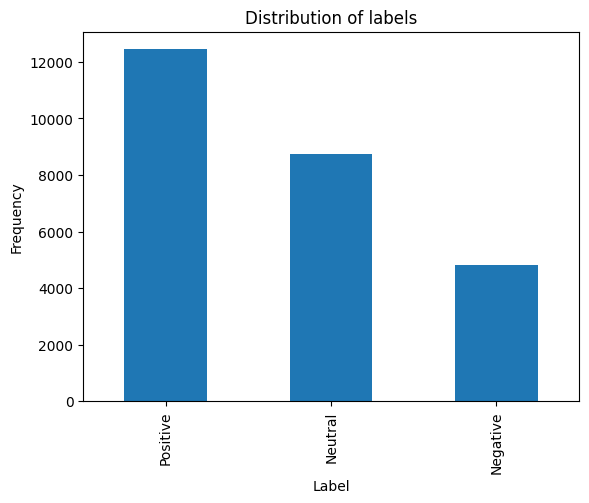

In [7]:
label_distribution = df['label'].value_counts()
label_distribution.plot(kind='bar')
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [27]:
import re
from nltk.corpus import stopwords

def clean(headline):
    healine = headline.lower()
    headline = re.sub('[^a-z A-Z 0-9-]+', '', headline)
    headline = " ".join([word for word in headline.split() if word not in stopwords.words('english')])
    return headline

df_2 = df.copy()
df_2['headline'] = df_2['headline'].apply(clean)

In [16]:
df_2.head()

,Unnamed: 0,headline,label
0,0,markets close mostly lower again rost panw rep...,Negative
1,1,gap plummets on earnings miss cuts full-year f...,Negative
2,2,billionaire ken fisher is selling these 10 stocks,Negative
3,3,corning net income drops 13 shares fall,Negative
4,4,internet explorer shutdown to cause japan prob...,Negative


In [28]:
def corpus(text):
    text_list = text.split()
    return text_list

df_2['headline_list'] = df_2['headline'].apply(corpus)
df_2.head()

,Unnamed: 0,headline,label,headline_list
0,0,Markets Close Mostly Lower Again ROST PANW Rep...,Negative,"[Markets, Close, Mostly, Lower, Again, ROST, P..."
1,1,Gap plummets earnings miss cuts full-year fore...,Negative,"[Gap, plummets, earnings, miss, cuts, full-yea..."
2,2,Billionaire Ken Fisher Selling These 10 Stocks,Negative,"[Billionaire, Ken, Fisher, Selling, These, 10,..."
3,3,Corning net income drops 13 shares fall,Negative,"[Corning, net, income, drops, 13, shares, fall]"
4,4,Internet Explorer shutdown cause Japan problem...,Negative,"[Internet, Explorer, shutdown, cause, Japan, p..."


In [50]:
from tqdm import trange

corpus = []
for i in trange(df_2.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df_2['headline_list'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 26000/26000 [00:00<00:00, 153862.30it/s]


244371

In [30]:
from collections import Counter

mostCommon = Counter(corpus).most_common(10)
mostCommon

[('Earnings', 3991),
 ('Stock', 2814),
 ('Stocks', 2655),
 ('Inc', 2129),
 ('Buy', 1925),
 ('2022', 1716),
 ('Is', 1653),
 ('You', 1561),
 ('Should', 1449),
 ('Why', 1422)]

In [31]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

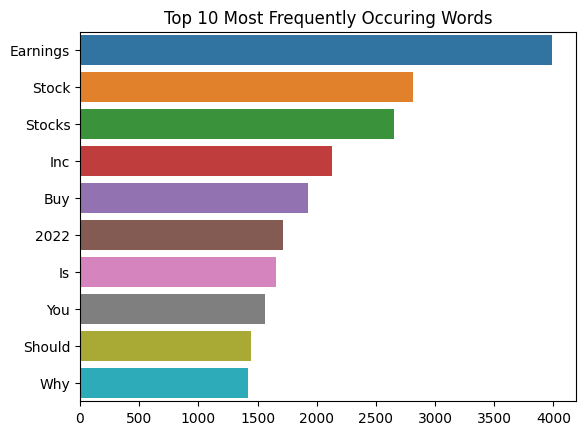

In [32]:
import seaborn as sns

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

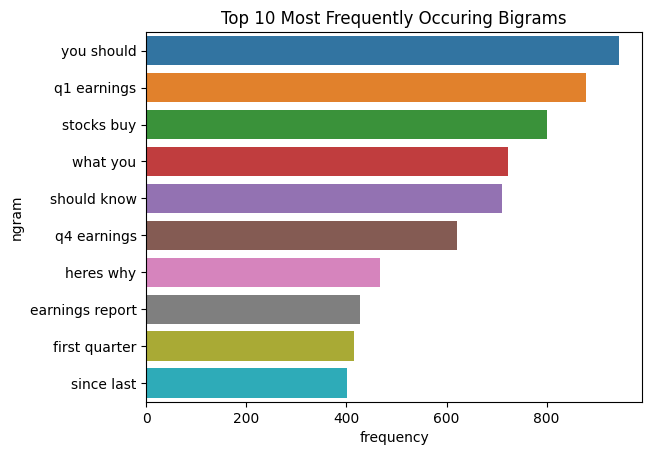

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_2['headline'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [54]:
positive_df = df_2.loc[df_2['label'] == 'Positive']
positive_df.reset_index(drop=True, inplace=True)
positive_df.shape

(12448, 4)

In [55]:
positive_df.head()

,Unnamed: 0,headline,label,headline_list
0,13552,Should You Consider Investing Align Technology...,Positive,"[Should, You, Consider, Investing, Align, Tech..."
1,13553,Abbott Release EleCare Amino Acid-based Formul...,Positive,"[Abbott, Release, EleCare, Amino, Acid-based, ..."
2,13554,Chubb CB Stock Surges 243 Year Whats Driving It,Positive,"[Chubb, CB, Stock, Surges, 243, Year, Whats, D..."
3,13555,Hedge Funds Are Warming Up To Leggett Platt In...,Positive,"[Hedge, Funds, Are, Warming, Up, To, Leggett, ..."
4,13556,Is DexCom DXCM Solid Growth Stock 3 Reasons Th...,Positive,"[Is, DexCom, DXCM, Solid, Growth, Stock, 3, Re..."


In [57]:
negative_df = df_2.loc[df_2['label'] == 'Negative']
negative_df.reset_index(drop=True, inplace=True)
negative_df.shape

(4804, 4)

In [58]:
negative_df.head()

,Unnamed: 0,headline,label,headline_list
0,0,Markets Close Mostly Lower Again ROST PANW Rep...,Negative,"[Markets, Close, Mostly, Lower, Again, ROST, P..."
1,1,Gap plummets earnings miss cuts full-year fore...,Negative,"[Gap, plummets, earnings, miss, cuts, full-yea..."
2,2,Billionaire Ken Fisher Selling These 10 Stocks,Negative,"[Billionaire, Ken, Fisher, Selling, These, 10,..."
3,3,Corning net income drops 13 shares fall,Negative,"[Corning, net, income, drops, 13, shares, fall]"
4,4,Internet Explorer shutdown cause Japan problem...,Negative,"[Internet, Explorer, shutdown, cause, Japan, p..."


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 12448/12448 [00:00<00:00, 84349.71it/s]


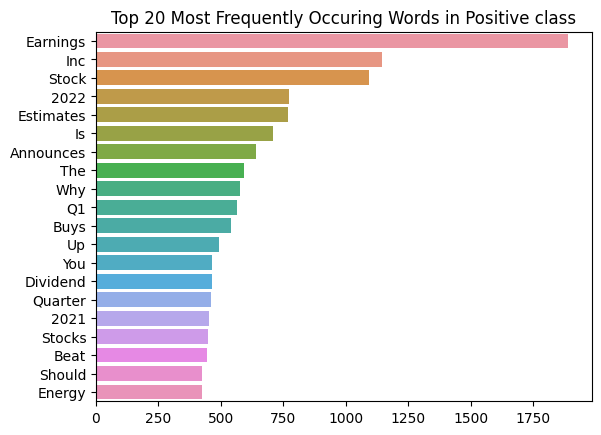

In [62]:
corpus = []
for i in trange(positive_df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += positive_df['headline_list'][i]

mostCommon = Counter(corpus).most_common(20)
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 20 Most Frequently Occuring Words in Positive class')
plt.show()

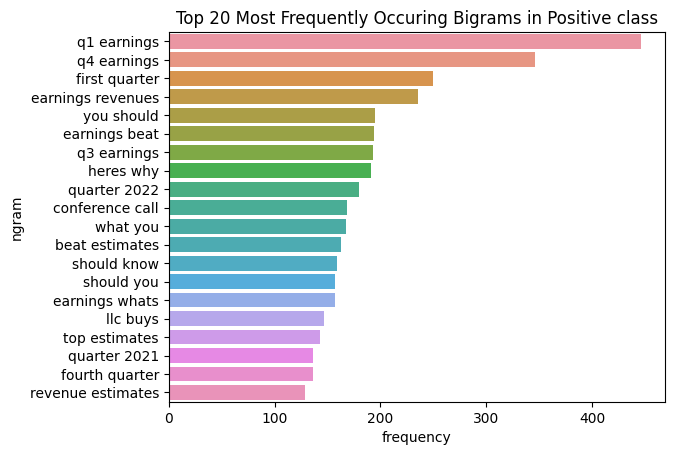

In [67]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(positive_df['headline'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:20], y=ngram_freq['ngram'][:20])
plt.title('Top 20 Most Frequently Occuring Bigrams in Positive class')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4804/4804 [00:00<00:00, 126477.83it/s]


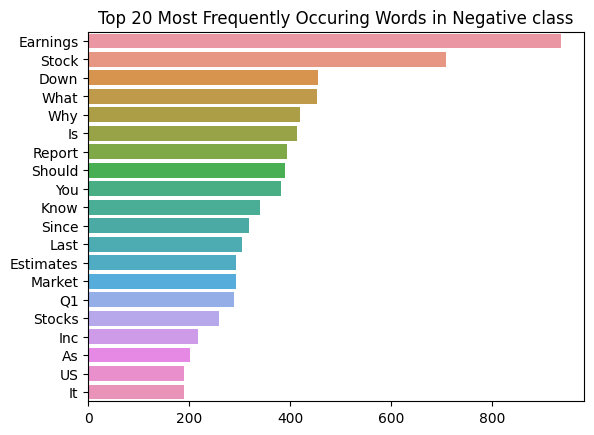

In [63]:
corpus = []
for i in trange(negative_df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += negative_df['headline_list'][i]

mostCommon = Counter(corpus).most_common(20)
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 20 Most Frequently Occuring Words in Negative class')
plt.show()

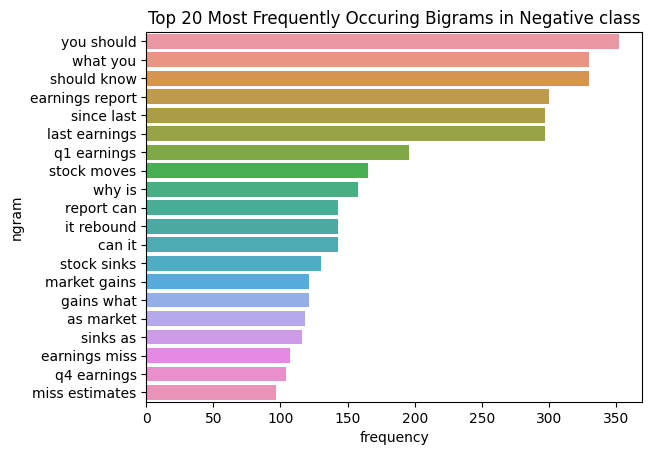

In [66]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(negative_df['headline'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:20], y=ngram_freq['ngram'][:20])
plt.title('Top 20 Most Frequently Occuring Bigrams in Negative class')
plt.show()

In [69]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(negative_df['headline'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

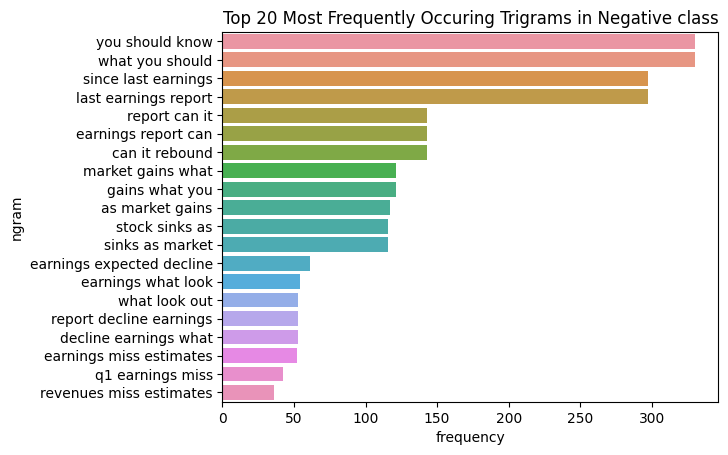

In [72]:
sns.barplot(x=ngram_freq['frequency'][:20], y=ngram_freq['ngram'][:20])
plt.title('Top 20 Most Frequently Occuring Trigrams in Negative class')
plt.show()

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, roc_auc_score

In [188]:
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['label'], test_size=0.2, random_state=42)

In [189]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [190]:
y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7240384615384615
Precision:  0.7305690810198644
Recall:  0.7240384615384615


In [197]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average=None)
recall = recall_score(y_test_encoded, y_pred_encoded, average=None)

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  [0.80136054 0.73533163 0.6983086 ]
Recall:  [0.60472279 0.63351648 0.84081463]


In [196]:
y_pred_proba = model.predict_proba(X_test_tfidf)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

f2 = fbeta_score(y_test_encoded, y_pred_encoded, beta=2, average='weighted')
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovo', average='weighted')

print("F2 Score: ", f2)
print("ROC AUC: ", roc_auc)

F2 Score:  0.7209434578079487
ROC AUC:  0.8655062270037884


In [91]:
X_test_list = X_test.tolist()

num_examples = 10

for i in range(len(X_test_list)):
    print("Заголовок: ", X_test_list[i])
    print("Настоящий ответ: ", y_test.iloc[i])
    print("Ответ модели: ", y_pred[i])
    print("\n")

    if i == num_examples - 1:
        break

Заголовок:  Phillips 66 (PSX) Stock Sinks As Market Gains: What You Should Know
Настоящий ответ:  Negative
Ответ модели:  Negative


Заголовок:  5 Dirt Cheap Homebuilder Stocks in 2022
Настоящий ответ:  Neutral
Ответ модели:  Neutral


Заголовок:  Royal Caribbean, Carnival, Norwegian Near Pre-Pandemic Crowds
Настоящий ответ:  Positive
Ответ модели:  Positive


Заголовок:  ESG Rating Firms Reeling as War Exposes Russian Blind Spot
Настоящий ответ:  Negative
Ответ модели:  Positive


Заголовок:  Alpa Sutaria Joins WestRock as Senior Vice President, Strategy and Sustainability
Настоящий ответ:  Neutral
Ответ модели:  Positive


Заголовок:  Kyndryl and NetApp Announce Alliance to Fast-track Cloud Transition and Transformation for Customers
Настоящий ответ:  Positive
Ответ модели:  Positive


Заголовок:  Comerica (CMA) Q4 Earnings Beat Estimates, Revenues Fall
Настоящий ответ:  Negative
Ответ модели:  Positive


Заголовок:  Tenaska Georgia Partners, L.P. -- Moody's affirms Tenaska Georgia P

In [99]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [138]:
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = CatBoostClassifier(iterations=500, verbose=False)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred.flatten())

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.6892307692307692
Precision:  0.70518240684168
Recall:  0.6892307692307692


In [113]:
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['label'], test_size=0.2, random_state=42)

In [114]:
vectorizer = TfidfVectorizer( min_df=0.03, max_df=0.97, max_features = 200000, ngram_range = (3, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=10000)

In [115]:
y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.4963461538461538
Precision:  0.5585494788957172
Recall:  0.4963461538461538


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average=None)
recall = recall_score(y_test_encoded, y_pred_encoded, average=None)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.4963461538461538
Precision:  [0.         0.96296296 0.47874676]
Recall:  [0.         0.1        0.99709061]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['label'], test_size=0.2, random_state=42)

y_pred = ['Positive'] * len(X_test)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.4626923076923077
Precision:  0.21408417159763313
Recall:  0.4626923076923077


In [157]:
def clean(headline):
    headline = headline.lower()
    headline = re.sub('[^a-z A-Z 0-9-]+', '', headline)
    headline = " ".join([word for word in headline.split() if word not in stopwords.words('english')])
    return headline

df_4 = pd.read_csv('stock_news.csv')
df_4['headline'] = df_4['headline'].apply(clean)
df_4.head()

,Unnamed: 0,headline,label
0,0,markets close mostly lower rost panw report ea...,Negative
1,1,gap plummets earnings miss cuts full-year fore...,Negative
2,2,billionaire ken fisher selling 10 stocks,Negative
3,3,corning net income drops 13 shares fall,Negative
4,4,internet explorer shutdown cause japan problem...,Negative


In [163]:
X_train, X_test, y_train, y_test = train_test_split(df_4['headline'], df_4['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7046153846153846
Precision:  0.711919509674477
Recall:  0.7046153846153846


In [164]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average=None)
recall = recall_score(y_test_encoded, y_pred_encoded, average=None)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7046153846153846
Precision:  [0.77062937 0.72584856 0.67761598]
Recall:  [0.56570842 0.61098901 0.83167082]


In [165]:
X_train, X_test, y_train, y_test = train_test_split(df_4['headline'], df_4['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(ngram_range = (3, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.6105769230769231
Precision:  0.6846420695253181
Recall:  0.6105769230769231


In [166]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average=None)
recall = recall_score(y_test_encoded, y_pred_encoded, average=None)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.6105769230769231
Precision:  [0.86054422 0.76100629 0.55566802]
Recall:  [0.25975359 0.3989011  0.9127182 ]


In [152]:
df_3.head()

,Unnamed: 0,headline,label
0,0,Markets Close Mostly Lower Again ROST PANW Rep...,Negative
1,1,Gap plummets earnings miss cuts full-year fore...,Negative
2,2,Billionaire Ken Fisher Selling These 10 Stocks,Negative
3,3,Corning net income drops 13 shares fall,Negative
4,4,Internet Explorer shutdown cause Japan problem...,Negative


In [149]:
df.head()

,Unnamed: 0,headline,label
0,0,"Markets Close Mostly Lower Again; ROST, PANW R...",Negative
1,1,"Gap plummets on earnings miss, cuts full-year ...",Negative
2,2,Billionaire Ken Fisher is Selling These 10 Stocks,Negative
3,3,"Corning net income drops 13%, shares fall",Negative
4,4,Internet Explorer shutdown to cause Japan prob...,Negative


In [167]:
df_4.head()

,Unnamed: 0,headline,label
0,0,markets close mostly lower rost panw report ea...,Negative
1,1,gap plummets earnings miss cuts full-year fore...,Negative
2,2,billionaire ken fisher selling 10 stocks,Negative
3,3,corning net income drops 13 shares fall,Negative
4,4,internet explorer shutdown cause japan problem...,Negative


In [175]:
from imblearn.over_sampling import RandomOverSampler

df_5 = df_4.copy()
ros = RandomOverSampler(random_state=0)
X = df_5['headline']
y = df_5['label']
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)
df_resampled = pd.DataFrame({'headline': X_resampled[:, 0], 'label': y_resampled})
df_resampled.head()

,headline,label
0,markets close mostly lower rost panw report ea...,Negative
1,gap plummets earnings miss cuts full-year fore...,Negative
2,billionaire ken fisher selling 10 stocks,Negative
3,corning net income drops 13 shares fall,Negative
4,internet explorer shutdown cause japan problem...,Negative


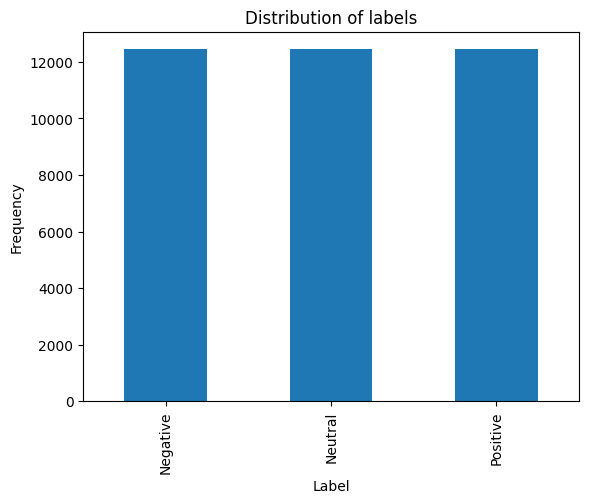

In [176]:
label_distribution = df_resampled['label'].value_counts()
label_distribution.plot(kind='bar')
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [207]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled['headline'], df_resampled['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(ngram_range = (3, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=5000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.8175123845226938
Precision:  0.8275925124232153
Recall:  0.8175123845226938


In [208]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average=None)
recall = recall_score(y_test_encoded, y_pred_encoded, average=None)

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  [0.9446281  0.83277751 0.70237288]
Recall:  [0.90606421 0.70342052 0.84193417]


In [209]:
y_pred_proba = model.predict_proba(X_test_tfidf)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

f2 = fbeta_score(y_test_encoded, y_pred_encoded, beta=2, average='weighted')
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovo', average='weighted')

print("F2 Score: ", f2)
print("ROC AUC: ", roc_auc)

F2 Score:  0.8169326233043109
ROC AUC:  0.919675010666111


In [210]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [173]:
class_counts = df_4['label'].value_counts()
min_class = class_counts.idxmin()
min_class_count = class_counts.min()
undersampled_dfs = []
for class_label, count in class_counts.iteritems():
    if class_label == min_class:
        undersampled_dfs.append(df[df['label'] == class_label])
    else:
        undersampled_dfs.append(df[df['label'] == class_label].sample(min_class_count))
df_undersampled = pd.concat(undersampled_dfs).sample(frac=1)


<ipython-input-173-bdcade11ee16>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for class_label, count in class_counts.iteritems():


In [201]:
X_train, X_test, y_train, y_test = train_test_split(df_undersampled['headline'], df_undersampled['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7266736038848421
Precision:  0.7262862094077107
Recall:  0.7266736038848421


In [202]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average=None)
recall = recall_score(y_test_encoded, y_pred_encoded, average=None)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7266736038848421
Precision:  [0.79452055 0.70974808 0.66983122]
Recall:  [0.80715706 0.69304813 0.67409766]


In [203]:
y_pred_proba = model.predict_proba(X_test_tfidf)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

f2 = fbeta_score(y_test_encoded, y_pred_encoded, beta=2, average='weighted')
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovo', average='weighted')

print("F2 Score: ", f2)
print("ROC AUC: ", roc_auc)

F2 Score:  0.7265630347217633
ROC AUC:  0.8877699404046062


In [204]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled['headline'], df_resampled['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=5000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7709198018476369
Precision:  0.769329313911915
Recall:  0.7709198018476369


In [205]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average=None)
recall = recall_score(y_test_encoded, y_pred_encoded, average=None)

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  [0.83509434 0.75385256 0.71753515]
Recall:  [0.8771304  0.72837022 0.70499797]


In [206]:
y_pred_proba = model.predict_proba(X_test_tfidf)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

f2 = fbeta_score(y_test_encoded, y_pred_encoded, beta=2, average='weighted')
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovo', average='weighted')

print("F2 Score: ", f2)
print("ROC AUC: ", roc_auc)

F2 Score:  0.7704307267163155
ROC AUC:  0.9107023576585122
